<a href="https://colab.research.google.com/github/thejatinbabbar/spam-detection/blob/main/community_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.cluster import SpectralClustering
import seaborn as sns
import networkx
import matplotlib.pyplot as plt

In [ ]:
DATA_PATH = '/content/drive/My Drive/Data_Mining'

In [ ]:
# Similarity between two users and removed rows whose similarity is less than 0.9
user_similarities_threshhold_9 = pd.read_csv(f'{DATA_PATH}/Social_spammers_dataset/graphs/c_combined_edges_w_1_s_0.9.csv')

# Similarity between two users and removed rows whose weight is more than 2
user_similarities_threshhold_9_and_2 = pd.read_csv(f'{DATA_PATH}/Social_spammers_dataset/graphs/c_combined_edges_w_2_s_0.9.csv')

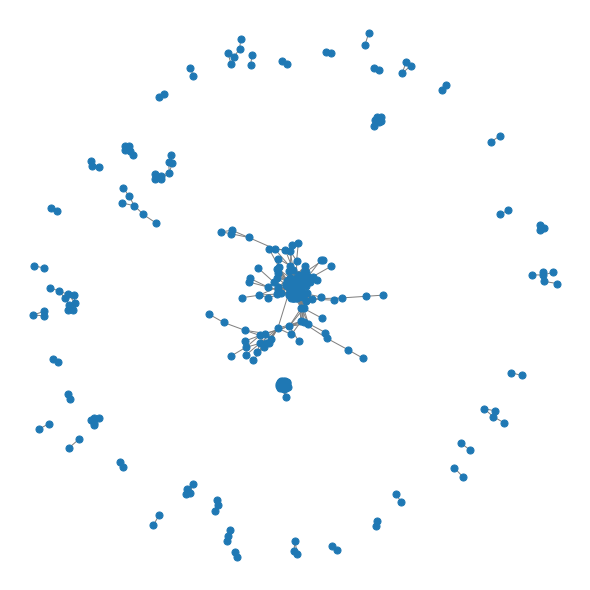

In [ ]:
# visualize the graph
graph = networkx.Graph()

graph.add_weighted_edges_from(user_similarities_threshhold_9[['Source', 'Target', 'Sim']].values)

# smaller nodes and fonts
plt.figure(2, figsize=(8,8))
networkx.draw(graph, node_size=50,font_size=8, edge_color='gray')

plt.show()

**Using Girvan Newman**

In [ ]:
def edge_to_remove(graph):
  G_dict = networkx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
def girvan_newman(graph):
	# find number of connected components
	sg = networkx.connected_components(graph)
	sg_count = networkx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = networkx.connected_components(graph)
		sg_count = networkx.number_connected_components(graph)

	return sg

In [ ]:
# find communities in the graph
c = girvan_newman(graph.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

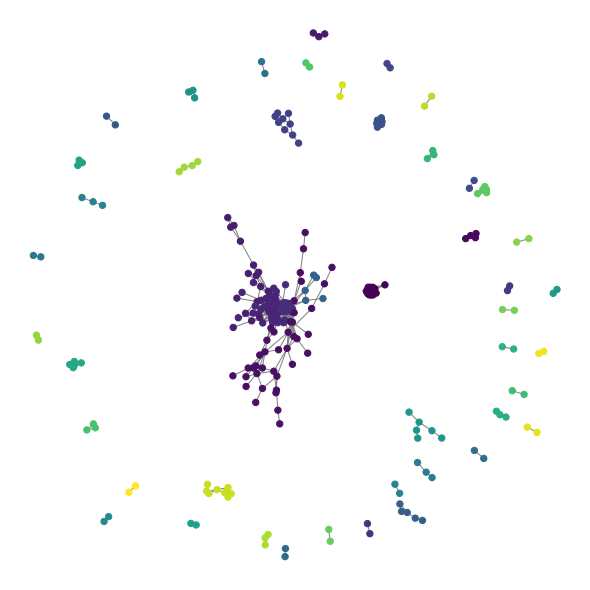

In [ ]:
import community

# Find modularity
part = community.best_partition(graph)
mod = community.modularity(part,graph)

values = [part.get(node) for node in graph.nodes()]

plt.figure(2, figsize=(8,8)) #24,24
networkx.draw_spring(graph, node_size=40, font_size=8, node_color=values, edge_color='gray')
plt.show()

**Using Louvain**

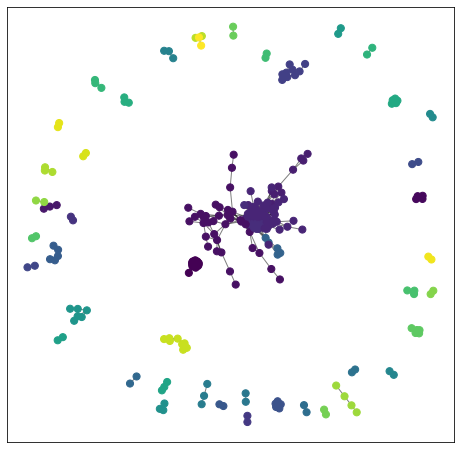

In [ ]:
import matplotlib.cm as cm

# visualize the graph
graph = networkx.Graph()

graph.add_weighted_edges_from(user_similarities_threshhold_9[['Source', 'Target', 'Sim']].values)

#first compute the best partition
partition = community.best_partition(graph)
# compute the best partition
partition = community.best_partition(graph)
# draw the graph
pos = networkx.spring_layout(graph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

plt.figure(2, figsize=(8,8)) # 24,24
networkx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=50, cmap=cmap, node_color=list(partition.values()))
networkx.draw_networkx_edges(graph, pos, node_size=40, alpha=0.5)
plt.show()